In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
import imp;
import warnings
warnings.filterwarnings('ignore')

# Descriptive statistics

## The population

This is what it is all about. At the heart of all statistics lies the study of a **statistical population**: the set of **ALL** the **individuals** about which we want to make **inferences**. These inferences are made about one or more **random variables** of an individual. These variables are called "random" as they are numerical outcomes of a random phenomenon.

Let's say we study the expression level of a gene "geneA" in mice (the random variable). The population for this study consists of all mice. For these individuals we want to make inferences about the variable "expression level of geneA".

It is clear that obtaining the expression level of geneA for the full population is not possible. Nevertheless, for the sake of explanation, we will **act** as if we have access to the full population. 

We can **describe** a population by a **probability density function (PDF)**.  This a **function**  whose value at any given point on the x-axis can be interpreted as providing a relative likelihood that the value of the random variable would equal that point. 

So, the PDF specifies the probability of a gene expression value falling within a particular range of values. As the PDF is a continuous function this probability is given by the integral of the PDF over that range. 

The population of our expression levels of geneA in mice has a very common symmetric (bell-like) shape that is known as a **normal (or Gaussian) PDF**.

The normal PDF is defined as

$$PDF=\frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}.$$

From the normal PDF we learn that its shape is completely defined by it's mean $\mu$ and variance $\sigma^2$. For a population $X$ that contains $N$ individuals $x_i \in X$ with $i=1 \dots N$ the mean $\mu$ is computed as

$$\mu = \frac{1}{N}\sum_{i=1}^{N}{x_i}$$

and the variance $\sigma^2$ as

$$\sigma^2 = \frac{1}{N}\sum_{i=1}^{N}{(x_i-\mu)^2}.$$

The variance $\sigma^2$ is a measure of spread of the population. 

To make this clear the following plot shows the normal PDF for different values of $\mu$ and $\sigma^2$:

<br/>
<br/>
<img src="https://github.com/sdgroeve/D012513/blob/master/part_I/normalPDF.png?raw=1"/>
<br/>
<br/>

A more intuitive measure of spread is the **standard deviation** $\sigma=\sqrt{\sigma^2}$. It is the distance from the mean out to either saddle point in the PDF. The saddle points on each graph are where the PDF changes from concave down to concave up. 

When a random variable follows a normal PDF we automatically know a few **properties** of the variable. For instance, about 68% of its values fall within one standard deviation from the mean, while 95% have a value within two standard deviations. This is shown in the figure below.

<br/>
<br/>
<img src="https://github.com/sdgroeve/D012513/blob/master/part_I/percentiles.png?raw=1" width="600" />
<br/>
<br/>

Next to the mean and variance there are other **parameters** that describe a population. 

The **median** is the value separating the higher half of a PDF from the lower half. 

The **quantiles** are cutpoints dividing the range of a PDF into continuous intervals with equal probabilities. q-Quantiles are values that partition a finite set of values into q subsets of (nearly) equal sizes. For instance the 4-quantile (also known as the quartile) partition a finite set of values into 4 subsets of (nearly) equal sizes that each contain (nearly) 25% of the values. The first quantile is a value Q1 such that 25% of the data has a value lower than Q1, the second quantile is a value Q2 such that 50% of the data has a value lower than Q2 (this is the same as the median), etc. 

The difference between Q3 and Q1 is known as the **interquartile range**. 

The 100-quantiles are known as **percentiles** and are also shown in the figure above.

## The sample

Again, in real live we don't have access to the full population. Instead we typically have access to a very small subset of the population: the **sample** or **dataset**.

Let's say we know the shape of the PDF for the geneA expression level in mice: $\mu=0.26$ and $\sigma=0.05$. Consider a (big) sample that contains $n=120$ mice (or **observations**) randomly drawn from the population:

In [2]:
n = 120
geneA_sample = np.random.normal(size=n,loc=0.26,scale=0.05)

One way to describe the expression level of geneA in the sample is through a **histogram**. To construct a histogram, the first step is to bin the range of expression values — that is, divide the entire range of values into a series of intervals — and then count how many values fall into each interval. The x-axis represents the bins, the y-axis represents the counts. This forms a graphical description/representation of the **distribution** of a the geneA expression levels. The term "distribution" typically refers to the shape of the histogram. Our geneA expression level in mice follows a normal distribution.

We can plot a histogram for the sample of geneA expression levels in Python as follows:

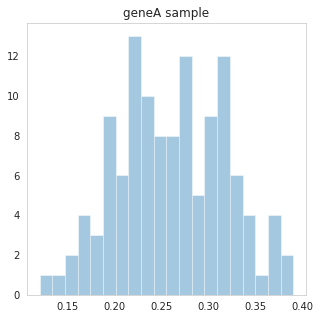

In [5]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

plt.figure(figsize=(5,5))
sns.distplot(geneA_sample,kde=False,bins=20)
plt.title("geneA sample")
plt.show()

It must be noted that the formulas for the mean and variance of a sample are slightly different. For a sample $x$ that contains $n$ observations $x_i \in s$ with $i=1 \dots n$ the mean is computed as

$$\overline{x} = \frac{1}{n-1}\sum_{i=1}^{n}{x_i}$$

and the variance as

$$s^2 = \frac{1}{n-1}\sum_{i=1}^{n}{(x_i-\mu)^2}.$$

Next to the histogram there is another popular graphical description of a distribution called the **boxplot** (also known as a **box and whisker diagram**). As shown in the image below it is a graphical representation of the quartiles where the range of the data is shown with the assumption that every value lower then Q1-1.5xIQR or higher then Q3+1.5xIQR is considered a outlier. Boxplots are more practical way of comparing the shapes of several distributions.

<img src="https://github.com/sdgroeve/D012513/blob/master/part_I/boxplot.png?raw=1" width="300"/>


The following code computes the mean of the sample:

In [4]:
print "mean of sample: %f" % np.mean(geneA_sample) 

SyntaxError: ignored

We see that the mean of the population does not equal the mean of the sample. Even though the sample was drawn at random from this population. 

If we want to make inferences about the population using the sample we need to take into account the uncertainty that is implied by a limited sample size $n<<N$. Statistics is all about quantifying this uncertainty by making **assumptions about the population(s)** from which one or more samples are drawn.

The mean and the variance of the population are examples of a **parameter**. Parameters are summary measures of a population and as such are **fixed**.

The sample mean and variance are known as **descriptive statistics** and are **variable** summary measures of a sample. This is  illustrated by drawing 100 smaller samples with $n=16$ and computing the mean for each sample:

In [ ]:
n=16

sample_means = []
for i in range(100):
    sample = np.random.normal(size=n,loc=0.26,scale=0.05)
    sample_means.append(np.mean(sample))

Plotting these sample means as a histogram shows that these means differ from sample to sample:

In [6]:
plt.figure(figsize=(5,5))
sns.distplot(sample_means,kde=False,bins=10)
plt.title("sample means")
plt.show()

NameError: ignored

<Figure size 360x360 with 0 Axes>

Notice how the shape of this distribution is again normal and the mean is close to the population mean:

In [ ]:
print "mean of sample means: %f" % np.mean(sample_means)

In fact if we increase the number of samples we draw from the population the mean of the sample mean gets closer and closer to the sample mean:

In [ ]:
n=16

sample_means = []
for i in range(200000):
    sample = np.random.normal(size=n,loc=0.26,scale=0.05)
    sample_means.append(np.mean(sample))
    
print "mean of sample means: %f" % np.mean(sample_means)

### The confidence interval

The sample means follow a normal distribution and also have a standard deviation: 

In [ ]:
np.std(sample_means)

Suppose we would be able to draw all possible samples with fixed sample size $n$ then the standard deviation of the sample means is known as the **standard error of the mean (SEM)** and is equal to the standard deviation of the population divided by the square root of the sample size $n$. 

As we have access to the full population we can compute the SEM as follows:

In [ ]:
print "SEM using population: %f" % (0.05/np.sqrt(n))

For **one sample** the SEM is estimated as:

$$SEM=\frac{s}{\sqrt{n}},$$

where $s$ is the standard deviation of the sample. Let's compute the SEM from just one sample:

In [ ]:
sample = np.random.normal(size=n,loc=0.26,scale=0.05)
print "SEM: %f" % (np.std(sample)/np.sqrt(n))

We can see that this is indeed close to the standard deviation of the population!

In fact, when we look at the formula for the SEM we see that SEM gets larger as the sample variance increases. At the same time the SEM will decrease as the sample size $n$ increases. The square root is used to decrease the impact of the sample size on the SEM as $n$ increases.

The SEM is used to compute a **confidence interval (CI)** for the mean of a population. The CI is an interval of values computed from the sample that is almost sure (set by a **level of confidence**) to cover the true population value. For instance, at a level of confidence of 95% the CI of the mean of a population is an interval of values computed from a sample drawn from this population that is 95% sure to cover the true population mean.

The CI of the mean of a population is computed using a sample $x$ from the population as 

$$[\overline{x} - t^* SEM,\overline{x} + t^* SEM],$$

where $t^*$ is a **T-statistic** that follows a **t-distribution** with $n-1$ degrees of freedom. Which t-distribution to use depends on the confidence level of the CI. For now it is sufficient to understand that the value for $t^*$ depends on the level of confidence. A more intuitive explanation of what a T-statistic is will be provided later in this course.

The following code declares a Python function that computes the confidence interval for a certain confidence level given a sample $x$:

In [ ]:
import scipy as sp
import scipy.stats

def CI_mean(x, confidence=0.95):
    a = 1.0*np.array(x)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

Suppose we would draw 1000 samples from the population of geneA expression levels and compute a 95% CI for each sample with the formula given above. As we have access to the full population we can compute the percentage of samples for which the CI indeed contains the population mean. This should be very close to 95%:

In [ ]:
confidence = 0.95
num_samples = 1000
n = 16

num_wrong = 0
for i in range(0,num_samples):
    m,l,h = CI_mean(np.random.normal(size=n,loc=0.26,scale=0.05),confidence)
    if (l >= 0.26) | (h <= 0.26):
        num_wrong += 1
prob = (1. - (float(num_wrong)/num_samples))
print "Probability that population mean is within sample CI: %f" % prob

To conclude, **as long as the population is normal (these is the assumption we make about the population!)**, one sample can be used to quantify the uncertainty (using the CI) about the mean of the population from which the sample was drawn.